<center>
    <img src="https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc.com%2Fimages%2F53691183%2F257316737287%2F1%2Foriginal.jpg?w=800&auto=compress&rect=0%2C0%2C2160%2C1080&s=74711a2a8c51eb0f3bd59e5d482fdc07" width="50%">
</center>

----------

<h1 align="center"> Deep Learning </h1>
<br>
<center align="left"> <font size='4'>  Developed by: </font> <img src="https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png" width="20%">
</center>
<br>
<center align="left"> <font size='4' color='#FF5713'> Accelerating your data science career! </font></center>
<br>

---------

Deep learning (also known as deep structured learning or hierarchical learning) is part of a broader family of machine learning methods based on artificial neural networks. Learning can be supervised, semi-supervised or unsupervised.

Deep learning architectures such as deep neural networks, deep belief networks, recurrent neural networks and convolutional neural networks have been applied to fields including computer vision, speech recognition, natural language processing, audio recognition, social network filtering, machine translation, bioinformatics, drug design, medical image analysis, material inspection and board game programs, where they have produced results comparable to and in some cases superior to human experts.

Artificial Neural Networks (ANNs) were inspired by information processing and distributed communication nodes in biological systems. ANNs have various differences from biological brains. Specifically, neural networks tend to be static and symbolic, while the biological brain of most living organisms is dynamic (plastic) and analog.

## Resources

### Video
https://www.youtube.com/watch?v=aircAruvnKk 

### Playground
https://playground.tensorflow.org/

### Visualization
http://scs.ryerson.ca/~aharley/vis/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

### Load data

In [2]:
(X_train_full, y_train_full), (X_test_full, y_test) = fashion_mnist.load_data()

### Normalize data

In [3]:
X_valid = X_train_full[:10000] / 255
X_train = X_train_full[10000:] / 255

y_valid = y_train_full[:10000]
y_train = y_train_full[10000:]

X_test = X_test_full / 255

In [4]:
X_train.shape

(50000, 28, 28)

In [5]:
X_valid.shape

(10000, 28, 28)

In [6]:
y_train.shape

(50000,)

### Visualize data

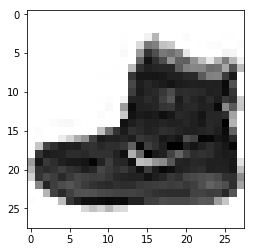

In [7]:
plt.imshow(X_train_full[0], cmap='gray_r');

In [8]:
class_names = 'tshirt-top trouser pullover dress coat sandal shirt sneaker bag ankle-boot'.split()
class_names

['tshirt-top',
 'trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle-boot']

In [9]:
class_names[y_train_full[0]]

'ankle-boot'

## Baseline model

### Exercise
- Train a logistic regression model on X_train, y_train, X_test, y_test
- Get the accuracy score

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train.reshape(50000, -1), y_train)

lr.score(X_test.reshape(10000, -1), y_test)

/home/vinny/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinny/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8416

## Neural Network with Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

- Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
- Supports both convolutional networks and recurrent networks, as well as combinations of the two.
- Runs seamlessly on CPU and GPU.

### Define architecture

In [11]:
model = Sequential() 
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


### Configure model

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Train model

In [14]:
%%time
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=128)

W0912 23:55:46.453450 140355999782656 deprecation.py:323] From /home/vinny/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 60us/sample - loss: 1.1301 - accuracy: 0.6666 - val_loss: 0.7642 - val_accuracy: 0.7429
Epoch 2/30
50000/50000 [==============================] - 3s 51us/sample - loss: 0.6815 - accuracy: 0.7758 - val_loss: 0.6283 - val_accuracy: 0.7923
Epoch 3/30
50000/50000 [==============================] - 3s 57us/sample - loss: 0.5897 - accuracy: 0.8027 - val_loss: 0.5673 - val_accuracy: 0.8062
Epoch 4/30
50000/50000 [==============================] - 3s 55us/sample - loss: 0.5405 - accuracy: 0.8157 - val_loss: 0.5333 - val_accuracy: 0.8158
Epoch 5/30
50000/50000 [==============================] - 3s 53us/sample - loss: 0.5109 - accuracy: 0.8242 - val_loss: 0.5099 - val_accuracy: 0.8246
Epoch 6/30
50000/50000 [==============================] - 2s 48us/sample - loss: 0.4894 - accuracy: 0.8299 - val_loss: 0.4835 - val_accuracy: 0.8334
Epoch 7/30
50000/50000 [==============================] 

### Plot training

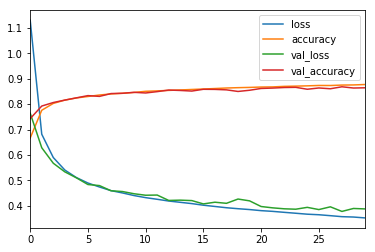

In [15]:
pd.DataFrame(history.history).plot();

### Make predictions

In [16]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 57us/sample - loss: 0.4083 - accuracy: 0.8547


[0.4082799252986908, 0.8547]

### Exercise

- Try training your own neural network using the same data on Google Colab:
    - https://colab.research.google.com/
- Enable GPU and compare training time to your local version
- Try changing the architecture and parameters to get a better score

## Feedback

<img src="data/feedback.png" width="70%" />

Link: https://bit.ly/CommunitechSurvey